## Importing the dataset from Kaggle

In [1]:
# Installing the kaggle library
!pip install kaggle

In [2]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:06<00:00, 25.7MB/s]
100% 163M/163M [00:06<00:00, 26.0MB/s]


In [4]:
# Extracting the dataset from the face-mask-dataset.zip file
from zipfile import ZipFile

with ZipFile("/content/face-mask-dataset.zip","r") as zip:
  zip.extractall()
  print("The dataset has been extracted from the face-mask-dataset.zip file!")

The dataset has been extracted from the face-mask-dataset.zip file!


## Importing some required libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Doing some data analysis

### The number of images in the data folder

In [6]:
import os

with_mask_images = os.listdir("/content/data/with_mask")
without_mask_images = os.listdir("/content/data/without_mask")

print("The number of images in the data folder: ", len(with_mask_images)+len(without_mask_images))
print("The number of images in the with_mask folder: ", len(with_mask_images))
print("The number of images in the without_mask folder: ", len(without_mask_images))

The number of images in the data folder:  7553
The number of images in the with_mask folder:  3725
The number of images in the without_mask folder:  3828


## Displaying the first two images from the with_mask and without_mask folders

The image size:  (983, 1236)


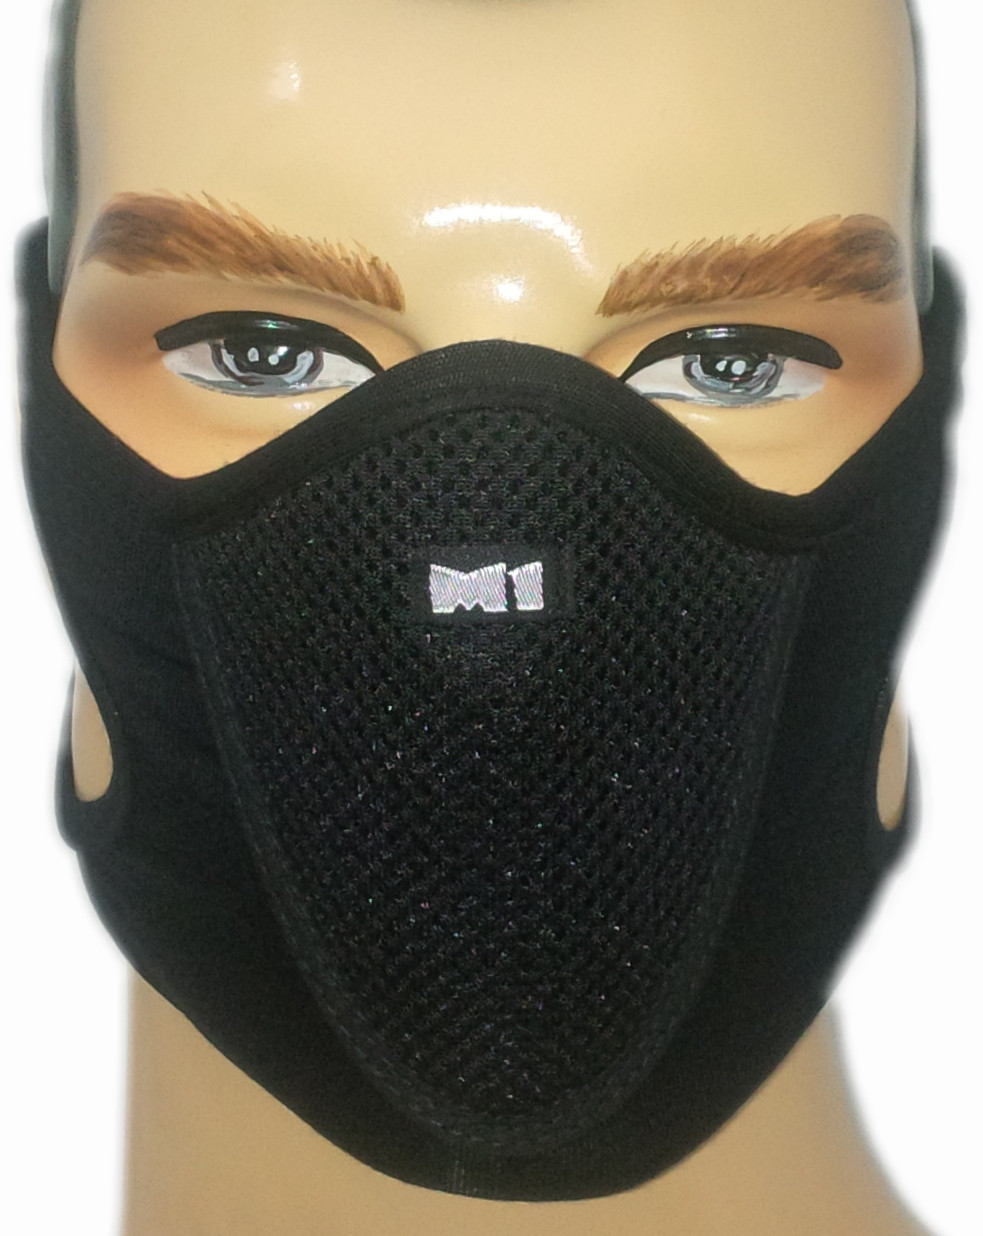


The image size:  (205, 251)


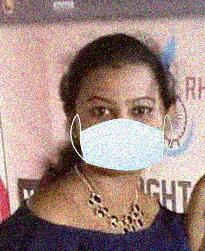

In [7]:
# Displaying the first two images from the with_mask folder
from PIL import Image

for image in with_mask_images[:2]:
  img = Image.open("/content/data/with_mask/"+image)
  print("The image size: ", img.size)
  display(img)
  print()

The image size:  (309, 322)


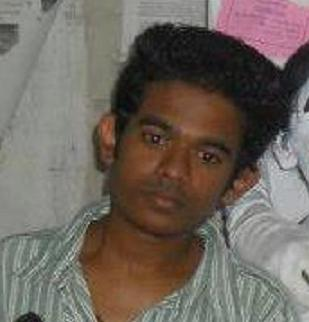


The image size:  (137, 148)


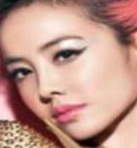

In [8]:
# Displaying the first two images from the without_mask folder

for image in without_mask_images[:2]:
  img = Image.open("/content/data/without_mask/"+image)
  print("The image size: ", img.size)
  display(img)
  print()

# Getting the independent variables
* Resizing all the images
* Converting the resized images to a numpy array

In [9]:
# Resizing all the images in the with_mask folder
# and then converting them to a numpy array

X = []
for image in with_mask_images:
  img = Image.open("/content/data/with_mask/"+image)
  img = img.resize((128,128))
  img = img.convert("RGB")
  X.append(np.array(img))

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [10]:
# Resizing all the images in the without_mask folder
# and then converting them to a numpy array

for image in without_mask_images:
  img = Image.open("/content/data/without_mask/"+image)
  img = img.resize((128,128))
  img = img.convert("RGB")
  X.append(np.array(img))

X = np.array(X)

In [11]:
print(X.shape)

(7553, 128, 128, 3)


## Getting the dependent variable

In [12]:
y = np.array([1]*len(with_mask_images) + [0]*len(without_mask_images))

In [13]:
print(y.shape)

(7553,)


## Splitting the dataset into the training set and the test set

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)
(6042,)
(1511,)


## Normalizing the independent variables

In [16]:
X_train = X_train/255
X_test = X_test/255

## Building the CNN model

In [17]:
import tensorflow as tf

In [18]:
# Building the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(128,128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
# The model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [20]:
# Compiling the CNN model
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [22]:
# Training the CNN model on the training set
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 [==============================] - 4s 21ms/step - loss: 0.1496 - accuracy: 0.9411 - val_loss: 0.2595 - val_accuracy: 0.9223
Epoch 2/10
170/170 [==============================] - 3s 20ms/step - loss: 0.1432 - accuracy: 0.9472 - val_loss: 0.2503 - val_accuracy: 0.9207
Epoch 3/10
170/170 [==============================] - 3s 18ms/step - loss: 0.1134 - accuracy: 0.9588 - val_loss: 0.2607 - val_accuracy: 0.9289
Epoch 4/10
170/170 [==============================] - 3s 18ms/step - loss: 0.0920 - accuracy: 0.9662 - val_loss: 0.2604 - val_accuracy: 0.9207
Epoch 5/10
170/170 [==============================] - 3s 19ms/step - loss: 0.0884 - accuracy: 0.9667 - val_loss: 0.2246 - val_accuracy: 0.9339
Epoch 6/10
170/170 [==============================] - 3s 19ms/step - loss: 0.0773 - accuracy: 0.9728 - val_loss: 0.3260 - val_accuracy: 0.9256
Epoch 7/10
170/170 [==============================] - 3s 18ms/step - loss: 0.0723 - accuracy: 0.9744 - val_loss: 0.3193 - val_accuracy: 0.9273

## Evaluating the CNN model on the test set

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)

48/48 [==============================] - 1s 11ms/step - loss: 0.3964 - accuracy: 0.9014


In [24]:
print("The loss of the test set: ", loss)
print("The accuracy of the test set: ", accuracy)

The loss of the test set:  0.39639899134635925
The accuracy of the test set:  0.9013898372650146


## Visualizing the loss and accuracy of the training set and cross validation set

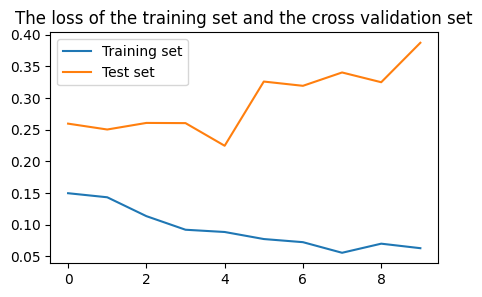

In [30]:
# Visualizing the loss of the training set and the cross validation set
h = history
plt.figure(figsize=(5,3))
plt.title("The loss of the training set and the cross validation set")
plt.plot(h.history['loss'], label="Training set")
plt.plot(h.history['val_loss'], label="Test set")
plt.legend()
plt.show()

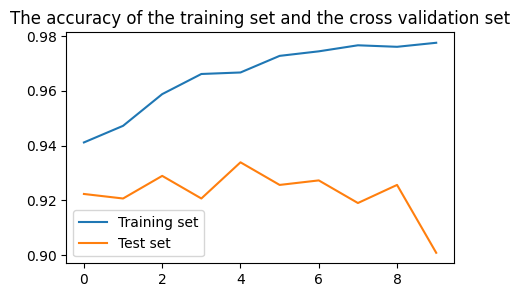

In [31]:
# Visualizing the accuracy of the training set and the cross validation set
h = history
plt.figure(figsize=(5,3))
plt.title("The accuracy of the training set and the cross validation set")
plt.plot(h.history['accuracy'], label="Training set")
plt.plot(h.history['val_accuracy'], label="Test set")
plt.legend()
plt.show()

## Building a predictive system

In [44]:
def mask_prediction(path, model):
  img = Image.open(path)
  img = img.resize((128,128))
  display(img)
  img = img.convert("RGB")
  img = np.array(img).reshape(1,128,128,3)
  img = img/255
  y_pred = model.predict(img)

  if y_pred[0][0] >= 0.5:
    return "This person is wearing a mask!"
  else:
    return "This person is not wearing a mask!"

Enter the path of your image: /content/download.jpg


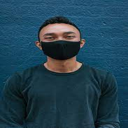

1/1 [==============================] - 0s 23ms/step
This person is wearing a mask!


In [45]:
path = input("Enter the path of your image: ")
result = mask_prediction(path, model)
print(result)

## Saving the trained model and testing it using the predictive system

In [42]:
# Saving the trained model
model.save("trained_model")

In [43]:
# Loading the trained model
trained_model = tf.keras.models.load_model("trained_model")

Enter the path of your image: /content/download.jpg


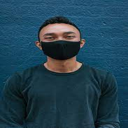

1/1 [==============================] - 0s 80ms/step
This person is wearing a mask!


In [47]:
# Testing the trained model using the predictive system
path = input("Enter the path of your image: ")
result = mask_prediction(path, trained_model)
print(result)

## Downloading the trained model

In [48]:
!zip -r trained_model.zip trained_model

  adding: trained_model/ (stored 0%)
  adding: trained_model/fingerprint.pb (stored 0%)
  adding: trained_model/keras_metadata.pb (deflated 91%)
  adding: trained_model/variables/ (stored 0%)
  adding: trained_model/variables/variables.data-00000-of-00001 (deflated 23%)
  adding: trained_model/variables/variables.index (deflated 63%)
  adding: trained_model/saved_model.pb (deflated 88%)
  adding: trained_model/assets/ (stored 0%)
